# Ford GoBike System Data Exploration

## Preliminary Wrangling

In this notebook we will explore the data and we will create new features (Feature Engineering) and visualize them and finally summarize our findings from these visuals.
The Data set I will be working on is <b>Ford GoBike System Data</b>.

In [1]:
# Loading all libraries and loading the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

df = pd.read_csv('201902-fordgobike-tripdata.csv')
print('data shape : ' + str(df.shape))
df.head()

data shape : (183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [2]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

There are 18,3412 bike records in the dataset with 16 features ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip'). Most variables are numeric in nature, but the variables member_gender and bike_share_for_all_trip are both categorical (nominal variables).

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features are best for predicting the average velocity (which is a feature that I am going to create using current features)(Feature Engineering). I will need to use the following features to calculate the average velocity for each ride [duration_sec, start_station_latitude , end_station_latitude , start_station_longitude , end_station_longitude ].

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that member_birth_year (age) will have the strongest effect on the velocity: the younger the diamond, the faster the ride. I also think that the user_type and gender will affect the average velocity. I expect that men will be faster than women and subscribers will be faster than normal customers.

In the next cells I will create the new features and I will do some data cleaning in the dataframe before we visualize the data. 

#### In the following code :
* I dropped unnecessary columns.
* The columns will be renamed.
* I will drop all the rows with null or nan values (They are very small compared to the full data frame [8,265 entries from 183,412 enrties]).
* We will create new age column from birth_year following that this data is gathered in 2019 after casting the birth year to integer.
* Rows index will be reset and we will check that there are no null values in our rows.

In [4]:
# Dropping all the unnecessary columns 
df.drop(axis = 1 , columns = ['start_time', 'end_time' , 'start_station_id',
                              'start_station_name','end_station_id' ,'end_station_name', 'bike_id'] , inplace =True)
# Renaming the columns to more appropriate names
df.rename(columns= {'duration_sec' : 'duration' , 'member_birth_year' : 'birth_year' 
                    , 'member_gender' : 'gender' , 'bike_share_for_all_trip' : 'bike_share'},inplace = True)
# Dropping all the rows with null values (or Nan) in gender and birth_year
df.dropna(axis = 0 , subset = ['gender' , 'birth_year'] , inplace = True)
# Creating the age column
df['birth_year'] = df['birth_year'].astype(int)
df['age'] = 2019 - df['birth_year']
# Resetting index
df.reset_index(inplace = True, drop = True)
# Checking that there is no rows with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175147 entries, 0 to 175146
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration                 175147 non-null  int64  
 1   start_station_latitude   175147 non-null  float64
 2   start_station_longitude  175147 non-null  float64
 3   end_station_latitude     175147 non-null  float64
 4   end_station_longitude    175147 non-null  float64
 5   user_type                175147 non-null  object 
 6   birth_year               175147 non-null  int32  
 7   gender                   175147 non-null  object 
 8   bike_share               175147 non-null  object 
 9   age                      175147 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(3)
memory usage: 12.0+ MB


#### Now let's create the average velocity colums with the following steps:
1) We will compute the difference between both the start and ending for both latitude and magnitude.<br>
2) Assuming that the difference between two consecutive latitudes is 111km and the difference between two consecutive longitude is 88 km (reference : https://www.usgs.gov/faqs/how-much-distance-does-a-degree-minute-and-second-cover-your-maps?qt-news_science_products=0#qt-news_science_products). We will calculate the displacement in both x and y directions in meters.<br>
3) We will use pythagoras theorem to calculate the total <b>displacement</b>.<br>
4) We will divide the displacement by time to get the average velocity in km/hour.(after scaling)<br>
5) We will drop all unnecessary columns.

In [5]:
df['x_diff'] = np.abs(df['start_station_longitude'] - df['end_station_longitude']) * 88000
df['y_diff'] = np.abs(df['start_station_latitude'] - df['end_station_latitude']) * 111000
df['displacement'] = np.sqrt(np.square(df['x_diff']) + np.square(df['y_diff']))
df['velocity'] = ( df['displacement'] / df['duration'] ) * 3.6
df.head(5)

,duration,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,birth_year,gender,bike_share,age,x_diff,y_diff,displacement,velocity
0,52185,37.789625,-122.400811,37.794231,-122.402923,Customer,1984,Male,No,35,185.856000,511.221600,543.957698,0.037525
1,61854,37.769305,-122.426826,37.786375,-122.404904,Customer,1972,Male,No,47,1929.068633,1894.766516,2703.968554,0.157375
2,36490,37.774836,-122.446546,37.773311,-122.444293,Subscriber,1989,Other,No,30,198.268890,169.321091,260.730100,0.025723
3,1585,37.804562,-122.271738,37.792714,-122.248780,Subscriber,1974,Male,Yes,45,2020.343808,1315.134097,2410.677664,5.475356
4,1793,37.770407,-122.391198,37.798014,-122.405950,Subscriber,1959,Male,No,60,1298.178381,3064.293080,3327.936175,6.681857


In [6]:
df.drop(axis = 1 , columns= ['start_station_latitude' ,'start_station_longitude', 'end_station_latitude'
                            ,'end_station_longitude' , 'x_diff' , 'y_diff' , 'birth_year' 
                            ,'duration' , 'displacement'],inplace = True)
df.describe()

,age,velocity
count,175147.000000,175147.000000
mean,34.193563,10.829835
std,10.116689,3.917192
min,18.000000,0.000000
25%,27.000000,8.718521
50%,32.000000,11.067475
75%,39.000000,13.358614
max,141.000000,35.947140


In [7]:
df.gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: gender, dtype: int64

#### Last steps of cleaning
1) We can see that there exist some rows where the velocity is zero. So we will remove them because they will give no meaning for our analysis.(It's maybe error in the data itself or it might be the starting point is the same as the end point)<br>
2) In the gender there exist (Other) category which is very small so I will drop them and make the analysis on both males and females.<br>
3) In the age, There exist a lot of outliers. there are some records with age 140. We will drop all the rows with age bigger than 90.

In [8]:
# Dropping the rows with zero velocity
df.drop(axis = 0 , inplace = True , index = df.query('velocity == 0').index)
# Dropping the Other category in gender
df.drop(axis = 0 , inplace = True , index = df.query('gender == "Other"').index)
# Dropping ages bigger than 90
df.drop(axis = 0 , inplace = True , index = df.query('age > 90').index)

In [9]:
df.head()

,user_type,gender,bike_share,age,velocity
0,Customer,Male,No,35,0.037525
1,Customer,Male,No,47,0.157375
3,Subscriber,Male,Yes,45,5.475356
4,Subscriber,Male,No,60,6.681857
5,Subscriber,Female,No,36,6.345295


These are the five variables we are interested in where the velocity is variable we are trying to explain using the others.

## Univariate Exploration

Here we will interpret each variable alone starting with the velocity variable.

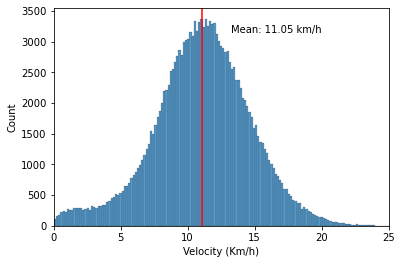

In [10]:
sb.histplot(df['velocity']);
plt.xlim((0,25));
plt.xlabel('Velocity (Km/h)');
plt.axvline(df.velocity.mean(),color = 'red');
plt.text(df.velocity.mean()*1.2, 3500*0.9, 'Mean: {:.2f} km/h'.format(df.velocity.mean()));

We can see that the average speed is normally distrubted with mean 11.05 km/h. I expected that the distrubution would be normal since there will be fast bikers and others slow but the majority would be in between those two extrems.We don't need to perform any transfomations on this variable.<br><br>
Now let's investigate the rest of the variables.

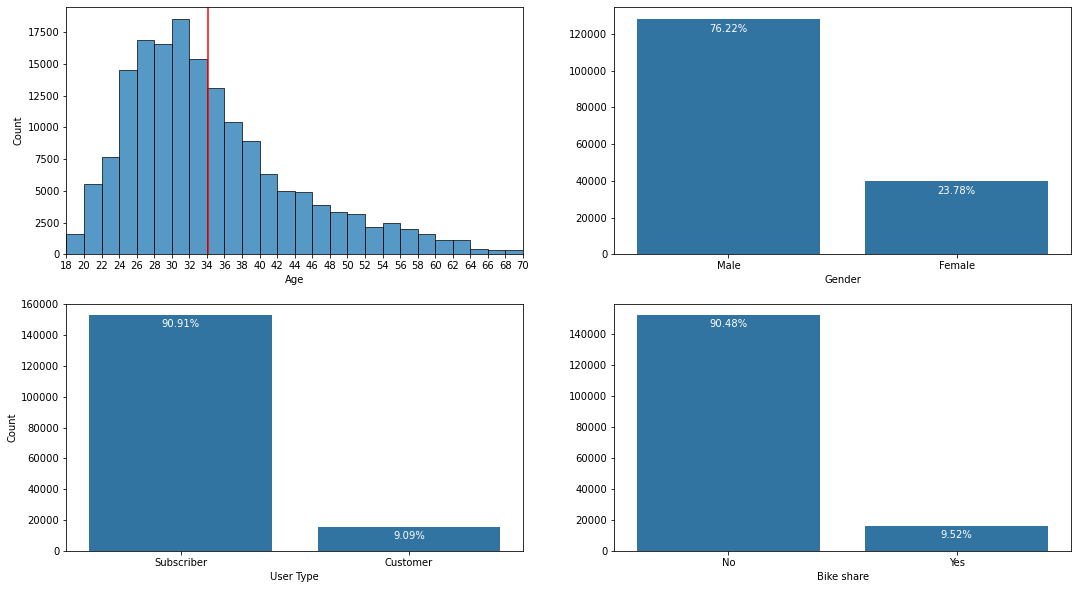

In [11]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [18, 10])
plt.subplot(2,2,1)
plt.xlabel('Age')
xticks = np.arange(18,140,2)
sb.histplot(df['age'],bins = xticks);
plt.xticks(xticks,xticks);
plt.xlim(18,70);
plt.axvline(df.age.mean(),color = 'red')
plt.subplot(2,2,2)
sb.countplot(data=df, x='gender' , color = base_color);
plt.ylabel('')
plt.xlabel('Gender')
male_perc = '{:.2f}%'.format(100 * df.query('gender == "Male"').shape[0] / df.shape[0])
female_perc = '{:.2f}%'.format(100 * df.query('gender == "Female"').shape[0] / df.shape[0])
plt.text(plt.xticks()[0][0],df.query('gender == "Male"').shape[0] -7000,male_perc, ha = 'center' , color = 'white')
plt.text(plt.xticks()[0][1],df.query('gender == "Female"').shape[0] -7000,female_perc, ha = 'center' , color = 'white');
plt.subplot(2,2,3)
sb.countplot(data=df, x='user_type' , color = base_color , order = ['Subscriber','Customer']);
plt.ylabel('Count')
plt.xlabel('User Type')
sub_perc = '{:.2f}%'.format(100 * df.query('user_type == "Subscriber"').shape[0] / df.shape[0])
cust_perc = '{:.2f}%'.format(100 * df.query('user_type == "Customer"').shape[0] / df.shape[0])
plt.text(plt.xticks()[0][0],df.query('user_type == "Subscriber"').shape[0] -7500,sub_perc, ha = 'center' , color = 'white')
plt.text(plt.xticks()[0][1],df.query('user_type == "Customer"').shape[0] -7500,cust_perc, ha = 'center' , color = 'white')
plt.subplot(2,2,4)
sb.countplot(data=df, x='bike_share' , color = base_color , order = ['No','Yes']);
plt.ylabel('')
plt.xlabel('Bike share')
no_perc = '{:.2f}%'.format(100 * df.query('bike_share == "No"').shape[0] / df.shape[0])
yes_perc = '{:.2f}%'.format(100 * df.query('bike_share == "Yes"').shape[0] / df.shape[0])
plt.text(plt.xticks()[0][0],df.query('bike_share == "No"').shape[0]-7500,no_perc, ha = 'center' , color = 'white')
plt.text(plt.xticks()[0][1],df.query('bike_share == "Yes"').shape[0]-7500 ,yes_perc, ha = 'center' , color = 'white');

#### Comments:
1) For the age distrubution of the bikers we can see that it tends to be normally distributed but it's right skewed. The mean of the distribution is 34 years.<br>
2) We can see that the majority of the bikers from this data are males with 76.23% and one third of the bikers are females.<br>
3) Most of the bikers are subscribers not customers and they do not share bikes.

## Bivariate  Exploration

Here we will interpret two variables at a time to see interactions between variables. We will begin first by the age and velocity.

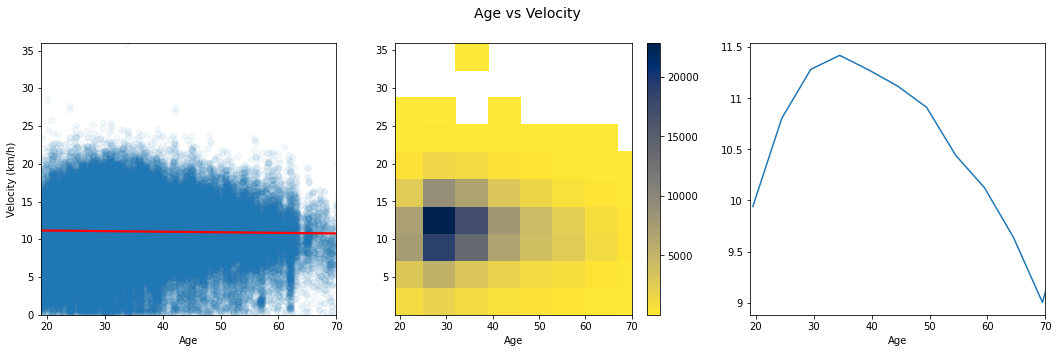

In [128]:
plt.figure(figsize = [18, 5])
plt.suptitle('Age vs Velocity',fontsize = 14)
plt.subplot(1,3,1)
sb.regplot(data = df, x = 'age', y = 'velocity', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20},line_kws={"color": "red"})
plt.ylabel('Velocity (km/h)')
plt.xlabel('Age')
plt.xlim((19,70))
plt.ylim((0,36))
plt.subplot(1,3,2)
plt.hist2d(data = df, x = 'age', y = 'velocity',cmap='cividis_r',cmin=0.5)
plt.xlim((19,70))
plt.xlabel('Age')
plt.colorbar();
plt.subplot(1,3,3)
bin_edges = np.arange(17, df['age'].max()+5, 5)
plt.xlim((19,70))
plt.xlabel('Age')
plt.yticks([9,9.5,10,10.5,11,11.5],[9,9.5,10,10.5,11,11.5])
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
data_bins = pd.cut(df['age'], bin_edges, right = False,include_lowest = True)
means = df['velocity'].groupby(data_bins).mean()
plt.errorbar(x = bin_centers, y = means);

#### Comments :
1) There are many data points so the scatter plot didn't really show the data even after applying transperency and jitter.<br>
2) I used heat map on the right which was better than scatter plot due to the large number of points plotted.<br>
3) The regression line in the scatter plot shows that there is no linear relation between age and velocity.(the slope is nearly zero)<br>
4) The line plot shows that the velocity increases then it decreases. That's because when we grow up we become more stronger till growing up makes us old and weak.<br><br>
Now let's investigate other variables with the velocity:

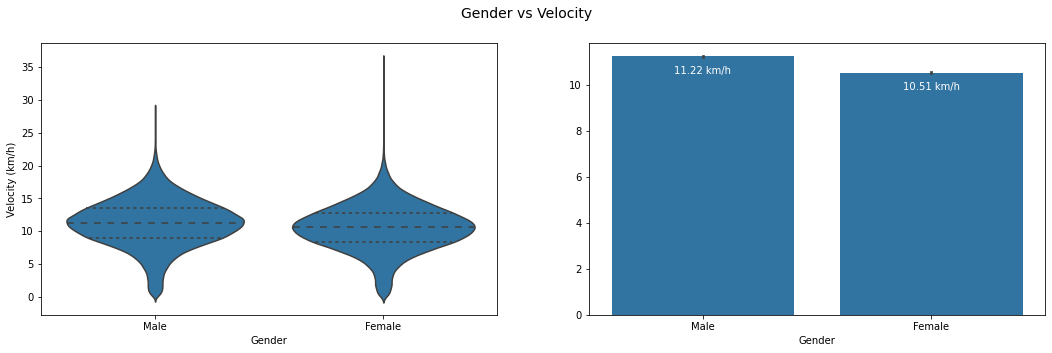

In [13]:
plt.figure(figsize = [18, 5])
base_color = sb.color_palette()[0]
plt.suptitle('Gender vs Velocity',fontsize = 14)
plt.subplot(1,2,1)
sb.violinplot(data=df, x='gender', y='velocity',inner ='quartiles' , color = base_color);
plt.ylabel('Velocity (km/h)')
plt.xlabel('Gender')
plt.subplot(1,2,2)
sb.barplot(data=df, x='gender', y='velocity',color = base_color)
male_mean = df.query('gender == "Male"')['velocity'].mean()
female_mean =df.query('gender == "Female"')['velocity'].mean()
plt.text(plt.xticks()[0][0],male_mean - 0.75 ,'{:.2f} km/h'.format(male_mean), ha = 'center' , color = 'white')
plt.text(plt.xticks()[0][1],female_mean - 0.75 ,'{:.2f} km/h'.format(female_mean), ha = 'center' , color = 'white')
plt.xlabel('Gender')
plt.ylabel('');

#### Comments :
1) There is no big difference between both distrubutions.<br>
2) The women have much more outliers than males. Which means that the fastest ones are women.<br>
3) The Males are faster on average than women but not significantly faster.<br><br>

Now we will look at the last two variables which are the user_type and bike_share.

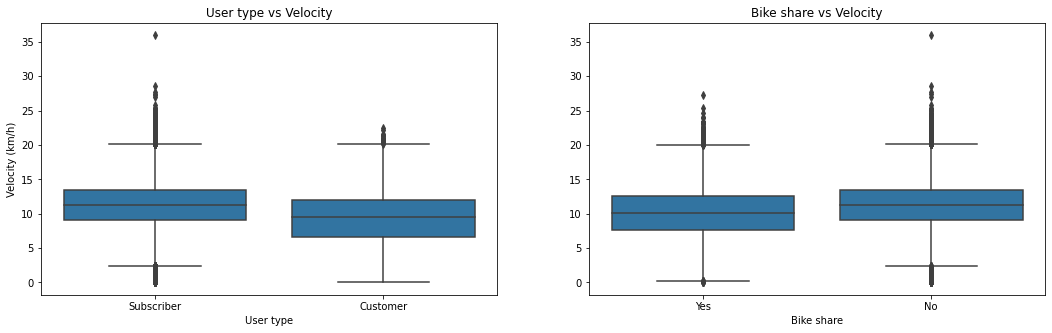

In [14]:
plt.figure(figsize = [18, 5])
base_color = sb.color_palette()[0]
plt.subplot(1,2,1)
plt.title('User type vs Velocity')
sb.boxplot(data=df, x='user_type', y='velocity' , color = base_color , order = ['Subscriber', 'Customer']);
plt.xlabel('User type')
plt.ylabel('Velocity (km/h)')
plt.subplot(1,2,2)
plt.title('Bike share vs Velocity')
sb.boxplot(data=df, x='bike_share', y='velocity' , color = base_color , order  = ['Yes', 'No']);
plt.xlabel('Bike share')
plt.ylabel('');

#### Comments :
1) Subscibers tends to be much faster than customers. The average of subscribers is bigger than the customers.<br>
2) The fastest bikers are subscibers.<br>
3) From subscribers (All of the bikers who share their bikes are subscribers), Those who doesn't share their bikes are faster than those who does.<br>

## Multivariate Exploration

I mostly intersted in how the gender and age play roles in predecting velocity. And also how the gender and user type play roles in the prediction. Let's start with the gender and age.

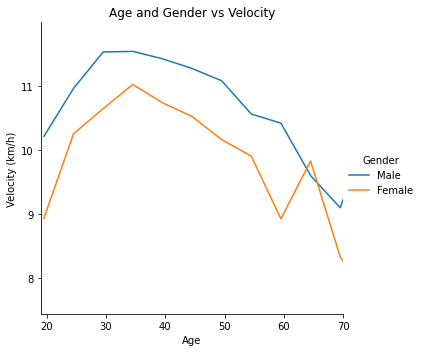

In [118]:
def mean_poly(x, y, bins = 10, **kwargs):
    plt.xlim((19,70))
    plt.title('Age and Gender vs Velocity')
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    data_bins = pd.cut(x, bins, right = False,include_lowest = True)
    means = y.groupby(data_bins).mean()
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(17, df['age'].max()+5, 5)
g = sb.FacetGrid(data = df, hue = 'gender', height = 5)
g.map(mean_poly, "age", "velocity", bins = bin_edges)
g.set_ylabels('Velocity (km/h)')
g.set_xlabels('Age')
g.add_legend(title='Gender');

#### Comments :
1) We can see that males are faster than women nearly for all ages. Since the blue line is above the yellow line which indicates that their velocity is higher.<br>
2) I didn't use either heat map or scatter plot because there are many data points and they weren't clear enough.<br><br>

Finally let's see the relation between gender and user_type vs velocity.

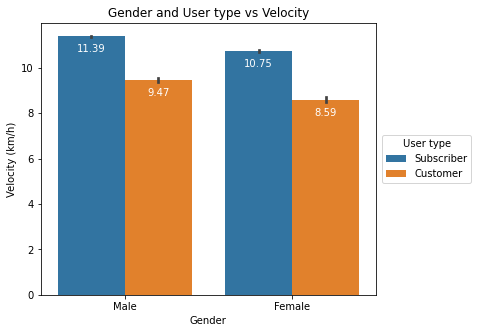

In [71]:
plt.figure(figsize=[6,5])
sb.barplot(data = df, x = 'gender', y = 'velocity', hue = 'user_type' , hue_order=['Subscriber','Customer'] );
plt.title('Gender and User type vs Velocity')
plt.ylabel('Velocity (km/h)')
plt.xlabel('Gender')
var_1 = df.query('user_type == "Subscriber" and gender == "Male"').velocity.mean()
var_2 = df.query('user_type == "Customer" and gender == "Male"').velocity.mean()
var_3 = df.query('user_type == "Subscriber" and gender == "Female"').velocity.mean()
var_4 = df.query('user_type == "Customer" and gender == "Female"').velocity.mean()
plt.text(plt.xticks()[0][0]-0.2,var_1 - 0.7 ,'{:.2f}'.format(var_1), ha = 'center' , color = 'white')
plt.text(plt.xticks()[0][0]+0.2,var_2 - 0.7 ,'{:.2f}'.format(var_2), ha = 'center' , color = 'white')
plt.text(plt.xticks()[0][1]-0.2,var_3 - 0.7 ,'{:.2f}'.format(var_3), ha = 'center' , color = 'white')
plt.text(plt.xticks()[0][1]+0.2,var_4 - 0.7 ,'{:.2f}'.format(var_4), ha = 'center' , color = 'white')
plt.legend(loc = 5 ,bbox_to_anchor=(1.3, 0.5), title='User type');

#### Comments :
1) We can see that subsribers have mean velocity higher than normal customers.<br>
2) We can see also that males have higher mean velocity than females. Since males subscibers mean velocity is biiger than females and also this goes for the males customers.<br>

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
The relation between age and velocity didn't show any linear correlation. When we grow up the average velocity increases till the age of 37 then it decreases when we get older. Plots showed that men are faster than women on average (not significantly). But the fastest among the bikers were women. The velocity is normally distrubted. Most of the subscribers (90.5%) doesn't share there bikes. The bikers who doesn't share there bikes tends to be faster than those who doesn't.

## Were there any interesting or surprising interactions between features?
All the results were expected. But my expectaions were higher such that the relation between age and average velocity would be stronger and that men would be faster more significantly than it appeared.